In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset as NetCDFFile 

import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
import cartopy
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import geopandas as gpd

import xarray as xr
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
gemsLis = ['GEMS/050/GEMS_HCHO_Inter_202201_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202202_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202203_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202204_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202205_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202206_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202207_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202208_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202209_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202210_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202211_050_P300.nc',
 'GEMS/050/GEMS_HCHO_Inter_202212_050_P300.nc']

In [3]:
tropLis = ['TROPOMI/050/TROP_HCHO_202201_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202202_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202203_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202204_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202205_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202206_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202207_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202208_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202209_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202210_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202211_050_P300.nc',
 'TROPOMI/050/TROP_HCHO_202212_050_P300.nc']

In [4]:
vza = xr.open_dataset('GEMS/GEMS_HCHO_VZA0.5.nc', engine="netcdf4").rename_vars({"HCHO_column": "VZA"})
vza


<xarray.Dataset>
Dimensions:  (lat: 120, lon: 170)
Coordinates:
  * lat      (lat) float64 -9.75 -9.25 -8.75 -8.25 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float64 60.25 60.75 61.25 61.75 ... 143.2 143.8 144.2 144.8
Data variables:
    VZA      (lat, lon) float64 ...

In [5]:
dfs = []

for i in range(len(gemsLis)):
    df1 = xr.open_dataset(gemsLis[i], engine="netcdf4").rename_vars({"HCHO_column": "GEMS"})
    df2 = xr.open_dataset(tropLis[i], engine="netcdf4").rename_vars({"HCHO_column": "TROPOMI"})
    df = xr.merge([df1, df2,vza])
    df = df.to_dataframe().dropna().reset_index()

    df['ratio'] = df['GEMS']/df['TROPOMI']
    df['df'] = df['GEMS']-df['TROPOMI']
    df['lat'] = df['lat']-0.5
    df['lon'] = df['lon']-0.5
    df = df.set_index(['lat','lon']).to_xarray()
    dfs.append(df)

In [6]:
od = pd.read_pickle('GEMS/OneDayGEMS')
od

,level_0,level_1,AirMassFactor,ClearAirMassFactor,DSCD,AMFCloudFraction,AMFCloudPressure,AMFDiagnostic,AMFSurfaceLER,ColumnAmount,...,LATConrner_right_up,LATConrner_left_bottom,LATConrner_right_bottom,LONConrner_left_up,LONConrner_right_up,LONConrner_left_bottom,LONConrner_right_bottom,mode,lat,lon
0,0,0,1.246460,1.246460,NaN,0.0,0.0,1036.0,0.048,NaN,...,45.793453,45.759247,45.755356,144.030533,143.930145,144.018570,143.918259,FC,45.8,144.0
1,0,1,1.243915,1.243915,-7.540064e+16,0.0,0.0,1036.0,0.048,-5.638614e+16,...,45.789467,45.755356,45.751377,143.930145,143.829773,143.918259,143.817978,FC,45.8,143.9
2,0,2,1.243857,1.243857,NaN,0.0,0.0,1036.0,0.048,NaN,...,45.785351,45.751377,45.747272,143.829773,143.729370,143.817978,143.717651,FC,45.8,143.8
3,0,3,1.244127,1.244127,NaN,0.0,0.0,1036.0,0.048,NaN,...,45.781345,45.747272,45.743275,143.729370,143.629089,143.717651,143.617462,FC,45.8,143.7
4,0,4,1.243350,1.243350,NaN,0.0,0.0,1036.0,0.048,NaN,...,45.777565,45.743275,45.739506,143.629089,143.529053,143.617462,143.517517,FC,45.8,143.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710651,2047,342,1.443971,1.443971,9.788939e+17,0.0,0.0,1036.0,0.065,6.843028e+17,...,-5.713108,-5.735021,-5.735051,117.035957,116.971458,117.035149,116.970650,HK,-5.7,117.0
710652,2047,343,1.443868,1.443868,NaN,0.0,0.0,1036.0,0.065,NaN,...,-5.713158,-5.735051,-5.735103,116.971458,116.906853,116.970650,116.906052,HK,-5.7,116.9
710653,2047,344,1.443764,1.443764,2.642642e+16,0.0,0.0,1036.0,0.065,2.468940e+16,...,-5.713233,-5.735103,-5.735179,116.906853,116.842331,116.906052,116.841522,HK,-5.7,116.9
710654,2047,345,1.443660,1.443660,NaN,0.0,0.0,1036.0,0.065,NaN,...,-5.713360,-5.735179,-5.735308,116.842331,116.777863,116.841522,116.777046,HK,-5.7,116.8


In [7]:
od2 = od[od['ViewingZenithAngle'].between(59.95,60.05)]
od3 = od[od['ViewingZenithAngle'].between(49.95,50.05)]


/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_20250/2041381991.py:10: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.93)
/Users/weitao/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


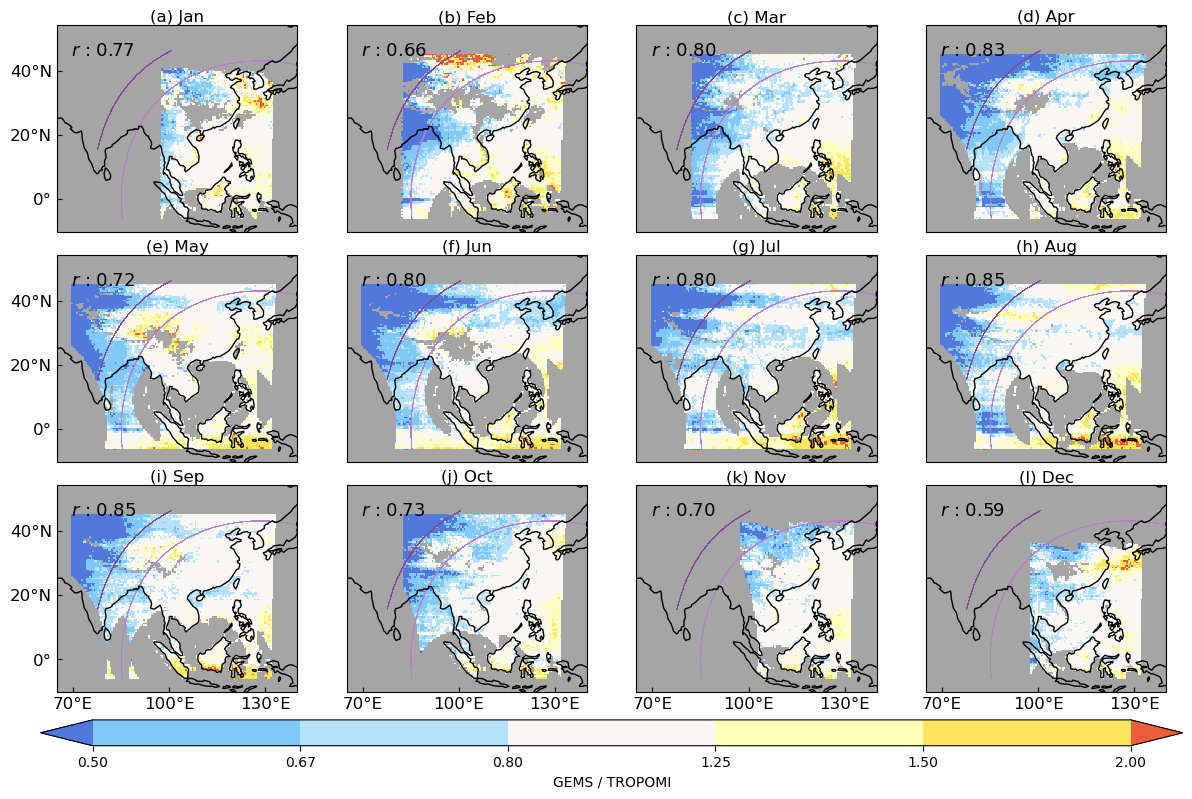

In [8]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi']=600
plt.style.use('default')
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lb = ['0.50', '0.67', '0.80', '1.25', '1.50', '2.00'  ]
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

fig = plt.figure(layout="constrained", figsize=(30*cm, 20*cm))

plt.subplots_adjust(top=0.93)

gs = GridSpec(4, 4, figure=fig, height_ratios=[4, 4, 4, 0.5])

ax0 = fig.add_subplot(gs[3, :])

ax1 = fig.add_subplot(gs[0, 0], projection=cartopy.crs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=cartopy.crs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2], projection=cartopy.crs.PlateCarree())
ax4 = fig.add_subplot(gs[0, 3], projection=cartopy.crs.PlateCarree())
ax5 = fig.add_subplot(gs[1, 0], projection=cartopy.crs.PlateCarree())
ax6 = fig.add_subplot(gs[1, 1], projection=cartopy.crs.PlateCarree())
ax7 = fig.add_subplot(gs[1, 2], projection=cartopy.crs.PlateCarree())
ax8 = fig.add_subplot(gs[1, 3], projection=cartopy.crs.PlateCarree())
ax9 = fig.add_subplot(gs[2, 0], projection=cartopy.crs.PlateCarree())
ax10 = fig.add_subplot(gs[2, 1], projection=cartopy.crs.PlateCarree())
ax11 = fig.add_subplot(gs[2, 2], projection=cartopy.crs.PlateCarree())
ax12 = fig.add_subplot(gs[2, 3], projection=cartopy.crs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for count in range(12):
    
    try:

        im = dfs[count]['ratio'].plot(ax=axs[count]
                             ,vmin = 0, vmax = 20

                             ,colors = ["#5179db", "#7fc8f8", "#b5e2fa", "#f9f7f3",  "#fdffb6", "#ffe45e",  "#eb5e3a"] 
                                                              ,levels=[0.5, 0.6666666, 0.8, 1.25, 1.5, 2]       


                             ,transform = ccrs.PlateCarree()

                             ,add_colorbar=False
                            )

    except:
        print('0')
    if (count==6):
        cbar = fig.colorbar(im, cax=ax0, orientation='horizontal',label='GEMS / TROPOMI',drawedges=False)
        cbar.set_ticklabels(lb)

    extent = [65, 140, -8, 48]
    axs[count].scatter(x='lon',y='lat',data=od2,color='#86469C',linewidths=0.1,marker='.',s=0.5)
    axs[count].scatter(x='lon',y='lat',data=od3,color='#BC7FCD',linewidths=0.1,marker='.',s=0.5)
    axs[count].set_xlabel('', labelpad = 0.1,color='white')
    axs[count].set_ylabel('', labelpad = 0.1,color='white')
    axs[count].add_feature(cfeature.COASTLINE, linewidth=1, alpha=1,color='black')
    
    axs[count].set_extent(extent)
    
    samp = dfs[count].to_dataframe().dropna().reset_index()
    samp = samp[samp['VZA']<60]
    samp = samp[samp['GEMS'].abs()<100]
    samp = samp[samp['TROPOMI'].abs()<100]
    corr, _ = pearsonr(samp['GEMS'], samp['TROPOMI'])
    axs[count].set_title('('+alp[count]+') '+month[count], pad = 0, fontsize=12)
    axs[count].text(0.06,0.85,'$\it{r}$ : '+"{:.2f}".format(corr),transform=axs[count].transAxes,size=13)

    for pos in ['right', 'top', 'bottom', 'left']:
        axs[count].spines[pos].set_visible(False) 
    axs[count].tick_params(axis='both', which='major', labelsize=12, direction = 'in',color='black')
    axs[count].set_facecolor("#a5a5a5")
    if count==0 or count==4 or count==8:
        axs[count].set_yticks(np.arange(0,51,20), crs=ccrs.PlateCarree())
        axs[count].yaxis.set_major_formatter(lat_formatter)

    if count==8 or count==9 or count==10 or count==11:
        axs[count].set_xticks(np.arange(70,135,30), crs=ccrs.PlateCarree())
        axs[count].xaxis.set_major_formatter(lon_formatter)
    axs[count].bbox_inches="tight"
#     plt.axis('off')
    count = count + 1

plt.rcParams['figure.dpi']=600
plt.rcParams['figure.constrained_layout.use'] = True

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_20250/3884046523.py:10: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.93)
/Users/weitao/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


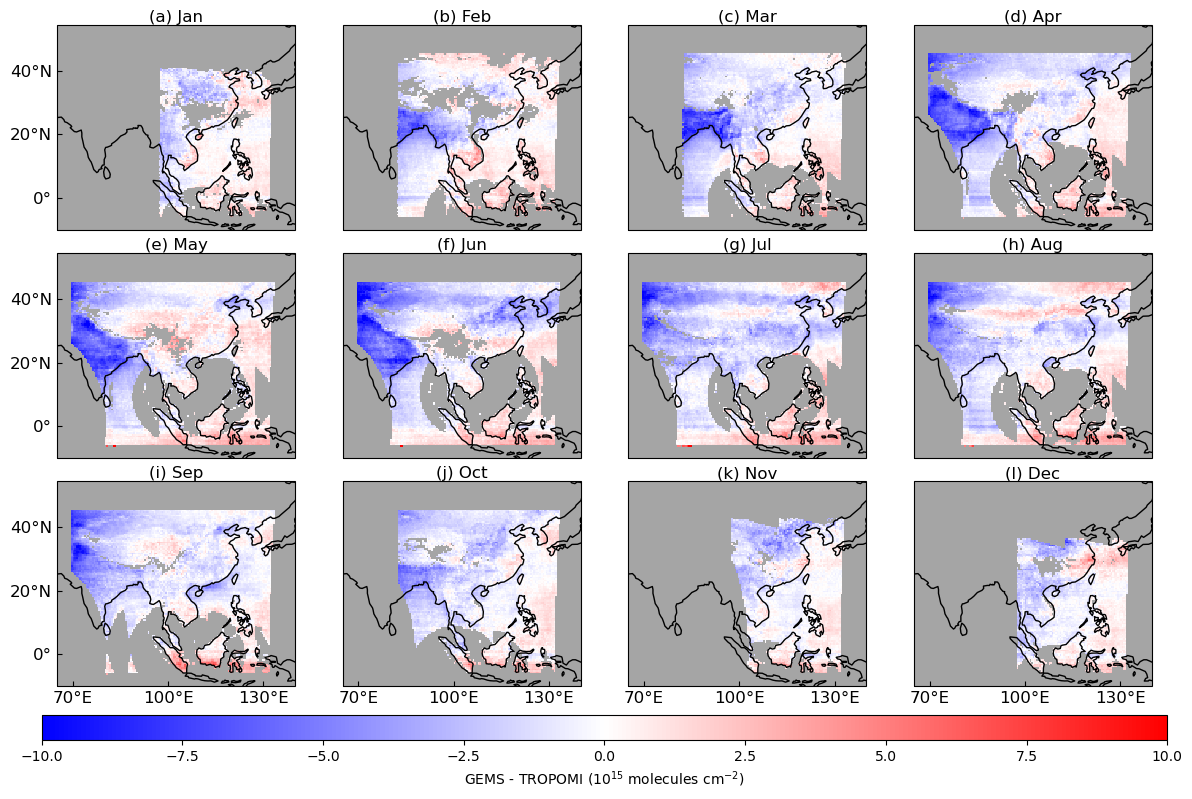

In [10]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi']=600
plt.style.use('default')
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lb = ['0.50', '0.67', '0.80', '1.25', '1.50', '2.00'  ]
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

fig = plt.figure(layout="constrained", figsize=(30*cm, 20*cm))

plt.subplots_adjust(top=0.93)

gs = GridSpec(4, 4, figure=fig, height_ratios=[4, 4, 4, 0.5])

ax0 = fig.add_subplot(gs[3, :])

ax1 = fig.add_subplot(gs[0, 0], projection=cartopy.crs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=cartopy.crs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2], projection=cartopy.crs.PlateCarree())
ax4 = fig.add_subplot(gs[0, 3], projection=cartopy.crs.PlateCarree())
ax5 = fig.add_subplot(gs[1, 0], projection=cartopy.crs.PlateCarree())
ax6 = fig.add_subplot(gs[1, 1], projection=cartopy.crs.PlateCarree())
ax7 = fig.add_subplot(gs[1, 2], projection=cartopy.crs.PlateCarree())
ax8 = fig.add_subplot(gs[1, 3], projection=cartopy.crs.PlateCarree())
ax9 = fig.add_subplot(gs[2, 0], projection=cartopy.crs.PlateCarree())
ax10 = fig.add_subplot(gs[2, 1], projection=cartopy.crs.PlateCarree())
ax11 = fig.add_subplot(gs[2, 2], projection=cartopy.crs.PlateCarree())
ax12 = fig.add_subplot(gs[2, 3], projection=cartopy.crs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for count in range(12):
    
    try:

        im = dfs[count]['df'].plot(ax=axs[count]
                             ,vmin = -10, vmax = 10
                                 ,cmap = "bwr"


                             ,transform = ccrs.PlateCarree()

                             ,add_colorbar=False
                            )

    except:
        print('0')
    if (count==6):
        cbar = fig.colorbar(im, cax=ax0, orientation='horizontal',label='GEMS - TROPOMI (10$^{15}$ molecules cm$^{-2}$)',drawedges=False)

    extent = [65, 140, -8, 48]

    axs[count].set_xlabel('', labelpad = 0.1,color='white')
    axs[count].set_ylabel('', labelpad = 0.1,color='white')
    axs[count].add_feature(cfeature.COASTLINE, linewidth=1, alpha=1,color='black')
    
    axs[count].set_extent(extent)
    
    samp = dfs[count].to_dataframe().dropna().reset_index()
    samp = samp[samp['GEMS'].abs()<100]
    samp = samp[samp['TROPOMI'].abs()<100]
    corr, _ = pearsonr(samp['GEMS'], samp['TROPOMI'])
    corr = str(round(corr,2))
    axs[count].set_title('('+alp[count]+') '+month[count], pad = 0, fontsize=12)

    for pos in ['right', 'top', 'bottom', 'left']:
        axs[count].spines[pos].set_visible(False) 
    axs[count].tick_params(axis='both', which='major', labelsize=12, direction = 'in',color='black')
    axs[count].set_facecolor("#a5a5a5")
    if count==0 or count==4 or count==8:
        axs[count].set_yticks(np.arange(0,51,20), crs=ccrs.PlateCarree())
        axs[count].yaxis.set_major_formatter(lat_formatter)

    if count==8 or count==9 or count==10 or count==11:
        axs[count].set_xticks(np.arange(70,135,30), crs=ccrs.PlateCarree())
        axs[count].xaxis.set_major_formatter(lon_formatter)
    axs[count].bbox_inches="tight"
    count = count + 1




# plt.suptitle('Monthly Difference of GEMS HCHO and TROPOMI in '+yr, size =13, weight = 'bold')

plt.rcParams['figure.dpi']=600
plt.rcParams['figure.constrained_layout.use'] = True